In [1]:
# Disney - Stock market abbreviation: DIS
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='your_API_key_here',output_format='pandas')

In [2]:
# Pull in Disney stock data: 'full' returns the full-length time series of 20+ years of historical data
DIS_data, metadata=ts.get_daily('DIS',outputsize='full')
DIS_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5226.000000,5226.000000,5226.000000,5226.000000,5.226000e+03
mean,56.091725,56.611333,55.535068,56.095625,9.433350e+06
std,37.213090,37.432899,36.931040,37.185586,5.785021e+06
min,13.800000,14.100000,13.480000,13.770000,1.487900e+06
25%,27.270000,27.650000,26.965000,27.292500,6.120075e+06
50%,35.500000,35.945000,35.110000,35.490000,8.003400e+06
75%,95.302500,96.265000,94.445000,95.187500,1.098850e+07
max,152.940000,153.410000,151.150000,151.640000,1.166250e+08


In [3]:
# Create a csv file of the data
DIS_data.to_csv('DIS_data.csv')

In [4]:
# Sort by date
DIS_data['date'] = DIS_data.index

In [5]:
# Show our data
DIS_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-07,130.22,131.94,128.66,129.93,16088579.0,2020-08-07
2020-08-06,126.96,131.63,125.61,130.82,27237996.0,2020-08-06
2020-08-05,123.37,130.31,123.28,127.61,53122394.0,2020-08-05
2020-08-04,115.96,118.35,115.76,117.29,17293923.0,2020-08-04
2020-08-03,116.17,117.12,115.35,116.35,10229172.0,2020-08-03
...,...,...,...,...,...,...
1999-11-05,25.50,25.50,24.06,24.31,26165000.0,1999-11-05
1999-11-04,27.75,29.00,26.00,26.50,13492400.0,1999-11-04
1999-11-03,27.38,27.38,26.69,26.88,8196800.0,1999-11-03


In [6]:
# Read in our stock market data to use for training
DIS_training_complete = pd.read_csv('//project_3/DIS_data.csv')

In [10]:
# Filter all the data from our training set and will retain only the values for the open column.
# We will use the opening stock price for our testing
DIS_training_processed = DIS_training_complete.iloc[:, 1:2].values

In [13]:
# Scale the data so we can use a recurrent neural network on it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

DIS_training_scaled = scaler.fit_transform(DIS_training_processed)

In [14]:
# Create two lists: feature_set and labels
features_set = []
labels = []
for i in range(60, 5226):
    features_set.append(DIS_training_scaled[i-60:i, 0])
    labels.append(DIS_training_scaled[i, 0])

In [15]:
# Convert both the feature_set and the labels list to the numpy array before we can use it for training
features_set, labels = np.array(features_set), np.array(labels)

In [16]:
# In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM.
# We need to convert our data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [17]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [18]:
# Instantiate the sequential class
model = Sequential()

In [19]:
# Add LSTM layer to the model that we just created. LSTM = Long Short-Term Memory, a type of RNN
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [20]:
# Add dropout layer to avoid overfitting of the data
model.add(Dropout(0.2))

In [21]:
# Add three more LSTM and dropout layers to our model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [22]:
# To make our model more robust we add a dense layer
model.add(Dense(units = 1))

In [23]:
# Compile the model and set parameters
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
# Train the model - this can take a while
model.fit(features_set, labels, epochs = 50, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5166 samples
Epoch 1/50
5166/5166 [==============================] - 26s 5ms/sample - loss: 0.0085
Epoch 2/50
5166/5166 [==============================] - 25s 5ms/sample - loss: 0.0021
Epoch 3/50
5166/5166 [==============================] - 27s 5ms/sample - loss: 0.0020
Epoch 4/50
5166/5166 [==============================] - 25s 5ms/sample - loss: 0.0017
Epoch 5/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0017
Epoch 6/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0017
Epoch 7/50
5166/5166 [==============================] - 23s 5ms/sample - loss: 0.0015
Epoch 8/50
5166/5166 [==============================] - 23s 5ms/sample - loss: 0.0013
Epoch 9/50
5166/5166 [==============================] - 23s 5ms/sample - loss: 0.0013
Epoch 10/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0011
Epoch 11/50
5166/5166 [

In [40]:
# Further training of the model
model.fit(features_set, labels, epochs = 50, batch_size = 32)

Train on 5166 samples
Epoch 1/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.9626e-04
Epoch 2/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.8841e-04
Epoch 3/50
5166/5166 [==============================] - 25s 5ms/sample - loss: 6.8298e-04
Epoch 4/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.6552e-04
Epoch 5/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.6940e-04
Epoch 6/50
5166/5166 [==============================] - 23s 5ms/sample - loss: 6.1070e-04
Epoch 7/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.4799e-04
Epoch 8/50
5166/5166 [==============================] - 23s 5ms/sample - loss: 6.3320e-04
Epoch 9/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.7955e-04
Epoch 10/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.8168e-04
Epoch 11/50
5166/5166 [==============================] - 24s 5ms/sample - los

In [25]:
# Pull in recent stock data to test the prediction model against - last 100 days of data
DIS_data2, metadata=ts.get_daily('DIS',outputsize='compact')
DIS_data2.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,110.852400,112.789968,108.802213,111.013600,1.805843e+07
std,9.605937,9.190662,10.209890,9.606692,8.838702e+06
min,84.490000,87.280000,79.070000,85.760000,6.821077e+06
25%,103.150000,105.525000,100.897500,103.322500,1.181192e+07
50%,113.730000,115.800000,112.270000,113.320000,1.646770e+07
75%,117.630000,119.372500,116.042500,117.877500,2.118588e+07
max,130.220000,131.940000,128.660000,130.820000,5.312239e+07


In [26]:
DIS_data2.to_csv('DIS_data2.csv')

In [27]:
DIS_data2['date'] = DIS_data2.index

In [28]:
DIS_data2

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-07,130.22,131.940,128.66,129.93,16088579.0,2020-08-07
2020-08-06,126.96,131.630,125.61,130.82,27237996.0,2020-08-06
2020-08-05,123.37,130.310,123.28,127.61,53122394.0,2020-08-05
2020-08-04,115.96,118.350,115.76,117.29,17293923.0,2020-08-04
2020-08-03,116.17,117.120,115.35,116.35,10229172.0,2020-08-03
...,...,...,...,...,...,...
2020-03-24,92.33,99.168,91.80,98.12,32478192.0,2020-03-24
2020-03-23,84.49,87.280,81.09,85.76,32198863.0,2020-03-23
2020-03-20,95.99,96.990,85.84,85.98,31924660.0,2020-03-20


In [29]:
# Pull in recent stock data to test the prediction model against - last 100 days of data
DIS_testing_complete = pd.read_csv('//project_3/DIS_data2.csv')
DIS_testing_processed = DIS_testing_complete.iloc[:, 1:2].values

In [31]:
# Concatenate our training data and testing data
DIS_total = pd.concat((DIS_training_complete['1. open'], DIS_testing_complete['1. open']), axis=0)

In [32]:
# Prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days
# We need opening stock prices for the 20 test days and the 60 stock prices from the last 60 days for the training set
test_inputs = DIS_total[len(DIS_total) - len(DIS_testing_complete) - 60:].values

In [33]:
# Scale the test data
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [48]:
# Prepare our final test input set that will contain previous 60 stock prices
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [49]:
# Convert our data into the three-dimensional format which can be used as input to the LSTM
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [50]:
# Call the predict method on the model that we trained
predictions = model.predict(test_features)

In [51]:
# Since we scaled our data, the predictions made by the LSTM are also scaled 
# We need to reverse the scaled predictions back to their actual values
predictions = scaler.inverse_transform(predictions)

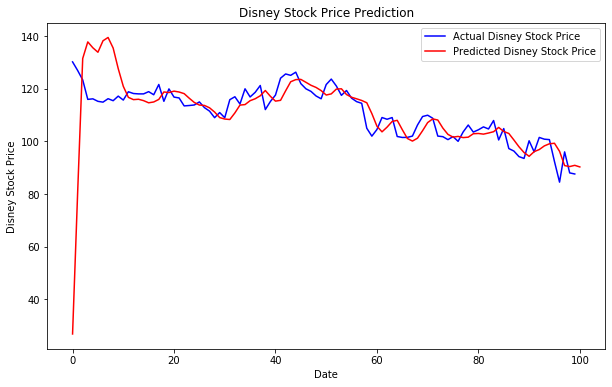

In [52]:
# Plot the results -model trained with 50 epochs 
plt.figure(figsize=(10,6))
plt.plot(DIS_testing_processed, color='blue', label='Actual Disney Stock Price')
plt.plot(predictions , color='red', label='Predicted Disney Stock Price')
plt.title('Disney Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Disney Stock Price')
plt.legend()
plt.show()

In [53]:
test_inputs = DIS_total[len(DIS_total) - len(DIS_testing_complete) - 60:].values

In [54]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [55]:
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [56]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [57]:
predictions = model.predict(test_features)

In [58]:
predictions = scaler.inverse_transform(predictions)

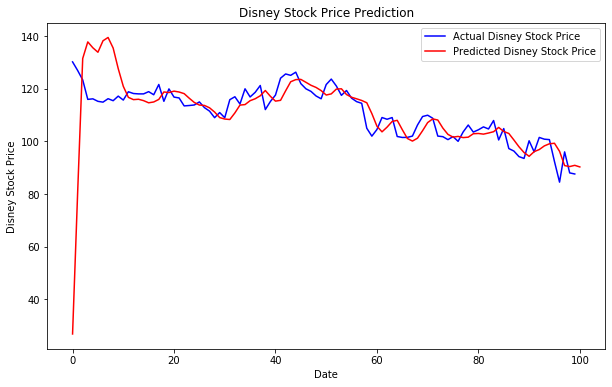

In [59]:
# Plot the results - model trained with 100 epochs 
plt.figure(figsize=(10,6))
plt.plot(DIS_testing_processed, color='blue', label='Actual Disney Stock Price')
plt.plot(predictions , color='red', label='Predicted Disney Stock Price')
plt.title('Disney Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Disney Stock Price')
plt.legend()
plt.show()

In [60]:
# Save the model - can be used later
model.save("Disney_model_trained.h5")